<a href="https://colab.research.google.com/github/VikaBilyk/mss/blob/main/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image X


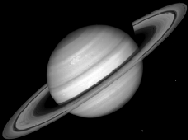

Image Y


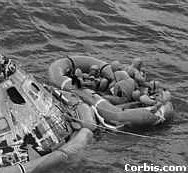

Знайдена псевдообернена матриця:
[[ 0.00000000e+00 -1.08837839e-02 -1.49123417e-02 ...  3.29352243e-03
  -1.03956184e-02  3.11258325e-01]
 [ 0.00000000e+00 -1.08837839e-02 -1.49123417e-02 ...  3.29352243e-03
  -1.03956184e-02  3.11258325e-01]
 [ 0.00000000e+00  9.87713703e-02  4.50754860e-03 ... -5.08319652e-03
   1.27679405e-02  2.04072557e-02]
 ...
 [ 0.00000000e+00  6.13071336e-01 -7.97015670e-04 ... -5.32668336e-04
   2.29664211e-03 -8.70962661e-03]
 [ 0.00000000e+00 -3.90796015e-01  5.23210109e-03 ...  1.81379026e-03
   1.03410940e-03  2.90665751e-02]
 [ 0.00000000e+00 -2.78640236e-01  3.01059179e-03 ... -1.36824227e-03
  -6.40661546e-03  2.31545234e-01]]
Середньоквадратичне відхилення (X+)X(X+) від (X+): 9.427057058833945e-27
Середньоквадратичне відхилення X(X+)X від X: 2.5789234997195805e-21
Image Yimage_projected_Gr


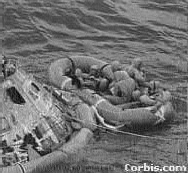

Середньоквадратична похибка знаходження образу: 313.0392678514545
psinv_pred:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.08607058e-02 -1.08607058e-02  9.85915068e-02 ...  6.11959028e-01
  -3.90087390e-01 -2.78129747e-01]
 [-1.49065532e-02 -1.49065532e-02  4.50343927e-03 ... -8.22280412e-04
   5.24803763e-03  3.02567381e-03]
 ...
 [ 3.29242916e-03  3.29242931e-03 -5.08323467e-03 ... -5.32896191e-04
   1.81384980e-03 -1.36883660e-03]
 [-1.03926683e-02 -1.03926686e-02  1.27723766e-02 ...  2.32365578e-03
   1.01736288e-03 -6.41686933e-03]
 [ 3.11159633e-01  3.11159633e-01  2.04026474e-02 ... -8.70049539e-03
   2.90541457e-02  2.31470425e-01]]
psinv_cur:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.08722959e-02 -1.08722961e-02  9.86813077e-02 ...  6.12514685e-01
  -3.90441251e-01 -2.78384748e-01]
 [-1.49094397e-02 -1.49094397e-02  4.50549162e-03 ... -8.09662807

In [23]:
# Імпорт необхідних бібліотек
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

# Зчитування матриць із файлів із зображенням та перекодування їх елементів
# із однобайтових у чотирибайтові числа
X = cv2.imread('/content/x1.bmp', cv2.IMREAD_GRAYSCALE).astype(np.float64)
Y = cv2.imread('/content/y2.bmp', cv2.IMREAD_GRAYSCALE).astype(np.float64)

# Виведення зображення X
print("Image X")
cv2_imshow(X)

# Виведення зображення Y
print("Image Y")
cv2_imshow(Y)

# Додавання рядка з одиниць до зображення X
X = np.vstack([X, np.ones((1, X.shape[1]))])

# Розміри матриць X та Y
m, n = X.shape
p = Y.shape[0]

# Формула Гревіля
psinv = np.empty((n, 0))  # Ініціалізація порожньої двовимірної матриці
X_cur = np.empty((0, n))  # Ініціалізація порожньої матриці для X_cur

for i in range(m):
    if i == 0:
        dotpr = X[i, :] @ X[i, :].T
        if dotpr == 0:
            psinv = np.hstack([psinv, np.zeros((n, 1))])
        else:
            psinv = np.hstack([psinv, X[i, :].T.reshape(-1, 1) / dotpr])
    else:
        Z = np.eye(n) - psinv @ X_cur
        denom = X[i, :] @ Z @ X[i, :].T
        if denom == 0:
            R = psinv @ psinv.T
            numer = R @ X[i, :].T
            denom = 1 + X[i, :] @ R @ X[i, :].T
            psinv = np.hstack([psinv - numer.reshape(-1, 1) @ (X[i, :] @ psinv).reshape(1, -1) / denom, numer.reshape(-1, 1) / denom])
        else:
            numer = Z @ X[i, :].T
            psinv = np.hstack([psinv - numer.reshape(-1, 1) @ (X[i, :] @ psinv).reshape(1, -1) / denom, numer.reshape(-1, 1) / denom])

    X_cur = np.vstack([X_cur, X[i, :]])

print("Знайдена псевдообернена матриця:")
print(psinv)

# Перевірка виконання характеристичної властивості псевдооберненої матриці
X_psinv_Gr = psinv

# Середньоквадратичне відхилення
mse1 = np.linalg.norm(X_psinv_Gr - X_psinv_Gr @ X @ X_psinv_Gr, np.inf) ** 2 / Y.size
print("Середньоквадратичне відхилення (X+)X(X+) від (X+):", mse1)

mse2 = np.linalg.norm(X - X @ X_psinv_Gr @ X, np.inf) ** 2 / Y.size
print("Середньоквадратичне відхилення X(X+)X від X:", mse2)

# Шукаємо оператор A перетворення X в Y
Z = np.eye(m) - X_cur @ X_psinv_Gr
V = np.zeros((p, m))
A_Gr = Y @ X_psinv_Gr + V @ Z
Yimage_Gr = A_Gr @ X

# Проекція елементів матриці на проміжок [0; 255]
Yimage_projected_Gr = np.zeros((p, n))
ymax = np.max(Yimage_Gr)
ymin = np.min(Yimage_Gr)

for i in range(p):
    for j in range(n):
        Yimage_projected_Gr[i, j] = 255 * (Yimage_Gr[i, j] - ymin) / (ymax - ymin)

# Виведення зображення Yimage_projected_Gr
print("Image Yimage_projected_Gr")
cv2_imshow(Yimage_projected_Gr.astype(np.uint8))  # Перетворюємо у uint8 для відображення

# Середньоквадратична похибка знаходження образу
mse_image = np.linalg.norm(Y.astype(np.float64) - Yimage_projected_Gr.astype(np.float64), np.inf) ** 2 / Y.size
print("Середньоквадратична похибка знаходження образу:", mse_image)

# Формула Мура-Пенроуза
epsilon = 0.000001

if m < n:
    X = X.T  # Транспонування X, якщо потрібно
    m, n = X.shape  # Оновлюємо розміри

delta = 0.001
psinv_pred = X.T @ np.linalg.inv(X @ X.T + delta * np.eye(m))

# Ділимо delta на 2 для наступного обчислення
delta /= 2
psinv_cur = X.T @ np.linalg.inv(X @ X.T + delta * np.eye(m))

print("psinv_pred:")
print(psinv_pred)
print("psinv_cur:")
print(psinv_cur)

